In [1]:
import sys, os
import numpy as np
rootdir = '../../..'
sys.path.append(rootdir)
from modules.hyperparam.bdd_aggregate_gt_transforms import (
    hyperparam_out_dir, filename_aggregated_transforms, filename_transforms_statistics, filename_class_instance_count)
from modules.hyperparam.bdd_aggregate_gt_transforms import load_data_json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reldir = '../'
aggregated_transforms_filepath = os.path.join(reldir, hyperparam_out_dir, filename_aggregated_transforms)
transforms_statictics_filepath = os.path.join(reldir, hyperparam_out_dir, filename_transforms_statistics)
class_instance_count_filepath = os.path.join(reldir, hyperparam_out_dir, filename_class_instance_count)

aggregated_transforms = load_data_json(aggregated_transforms_filepath)
transforms_statictics = load_data_json(transforms_statictics_filepath)
class_instance_count = load_data_json(class_instance_count_filepath)

In [3]:
for (class_name, num_instances) in class_instance_count.items():
    print(f'{class_name}: {num_instances}')
print('mean: ', transforms_statictics['mean'])
print('std: ', transforms_statictics['std'])

num_pos_samples: 93507
num_neg_samples: 250528
num_ignored_samples: 14507
mean:  [-0.002929835580289364, -0.008169739507138729, -0.05080288648605347, -0.007937428541481495]
std:  [0.12428951263427734, 0.09890233725309372, 0.24964886903762817, 0.2034754604101181]


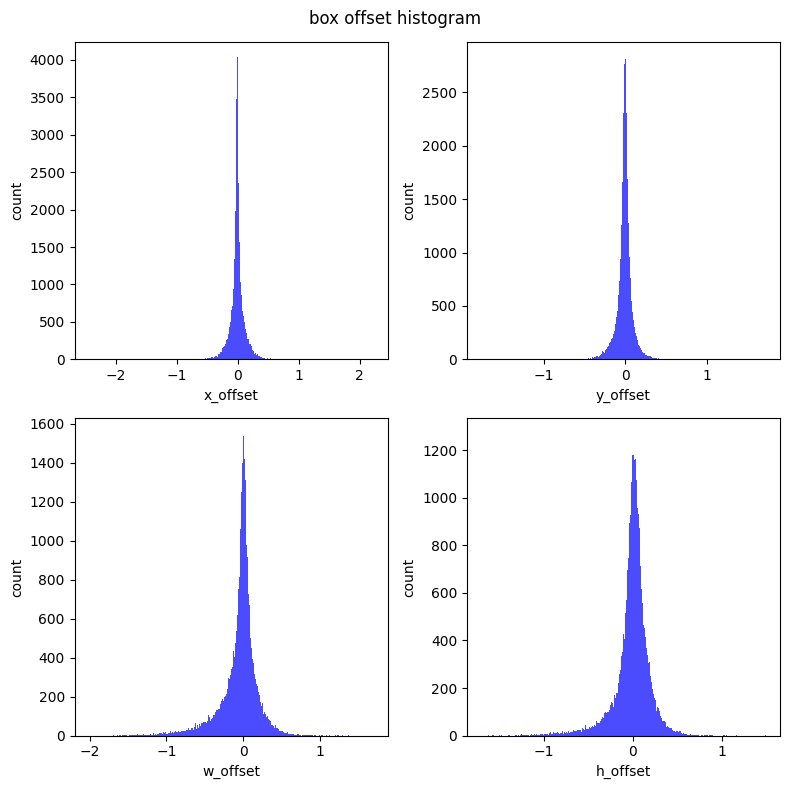

In [4]:
def plot_offset_histogram(aggregated_transforms, nbins, figsize):
    import numpy as np
    aggregated_transforms_np = np.array(aggregated_transforms)
    dx = aggregated_transforms_np[:,0]
    dy = aggregated_transforms_np[:,1]
    dw = aggregated_transforms_np[:,2]
    dh = aggregated_transforms_np[:,3]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    ax[0,0].hist(dx, nbins, color='blue', alpha=0.7)
    ax[0,0].set_xlabel('x_offset')
    ax[0,0].set_ylabel('count')

    ax[0,1].hist(dy, nbins, color='blue', alpha=0.7)
    ax[0,1].set_xlabel('y_offset')
    ax[0,1].set_ylabel('count')

    ax[1,0].hist(dw, nbins, color='blue', alpha=0.7)
    ax[1,0].set_xlabel('w_offset')
    ax[1,0].set_ylabel('count')

    ax[1,1].hist(dh, nbins, color='blue', alpha=0.7)
    ax[1,1].set_xlabel('h_offset')
    ax[1,1].set_ylabel('count')

    plt.suptitle('box offset histogram')
    plt.tight_layout()
    plt.show()


plot_offset_histogram(aggregated_transforms, nbins=1000, figsize=(8, 8))